### Part 3: Data acquisition from wether API
In this part we will be retrieving wild fires locations **weather** data using an API provided by `open-meteo.com`.

#### Imports section:

In [1]:
# Please note if running on a clean environment, need to install missing modules
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None

#### Global variables:

In [2]:
API_URL = 'https://archive-api.open-meteo.com/v1/archive'

FINAL_AFTER_PREP_CSV = 'fire_history_prep.csv'
ADD_WEATHER_CSV = 'fire_history_with_weather.csv'

FINAL_CSV = 'fire_history_final.csv'

PARAMETERS = ['temperature_2m_max', 'temperature_2m_min', 'windspeed_10m_max', 'winddirection_10m_dominant', 'shortwave_radiation_sum', 'precipitation_sum']
WEATHER_COLS = ['MaxTemperature', 'MinTemperature', 'WindSpeed', 'WindDirection', 'Radiation', 'Precipitation']

#### Retrieve weather data from open-mateo API:
*The `get_weather()` function is used to get daily weather information for a specific location.*

In [3]:
def get_weather(latitude, longitude, date):
    params = {'latitude': latitude, 'longitude': longitude, 'start_date': date, 'end_date': date, 
              'daily': PARAMETERS, 'mim': date, 'max': date, 'timezone': 'GMT'}
    response = requests.get(API_URL, params=params)
    if response.status_code == 200:
        return response.json()['daily']
    else:
        return None

*The `add_weather_data()` function is used to add the weather data to our DataFrame.*

In [4]:
def add_weather_data(df):
    df_updated = df.copy()
    df_updated[WEATHER_COLS] = np.nan

    lats = df_updated['InitialLatitude'].tolist()
    longs = df_updated['InitialLongitude'].tolist()
    dates = df_updated['FireDiscoveryDateTime'].tolist()

    final_data = [get_weather(lat, lon, date) for lat, lon, date in zip(lats, longs, dates)]

    for row in df_updated.index:
        for i in range(len(WEATHER_COLS)):
            df_updated[WEATHER_COLS[i]][row] = final_data[row][PARAMETERS[i]][0]

    return df_updated

#### Implementation section:

In [5]:
df = pd.read_csv(FINAL_AFTER_PREP_CSV)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0
...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0


Our data after adding the weather information

In [6]:
df = add_weather_data(df)
df.to_csv(ADD_WEATHER_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


In [9]:
print('DataFrame information:')
df.info()
print()
print('DataFrame description:')
df.describe(include='all')

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83426 entries, 0 to 83425
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniqueFireIdentifier   83426 non-null  object 
 1   FireDiscoveryDateTime  83426 non-null  object 
 2   FireOutDateTime        83426 non-null  object 
 3   InitialLatitude        83426 non-null  float64
 4   InitialLongitude       83426 non-null  float64
 5   POOCounty              83426 non-null  object 
 6   FireCause              83426 non-null  int64  
 7   FireDuration           83426 non-null  int64  
 8   CausedByWeather        83426 non-null  int64  
 9   MaxTemperature         83426 non-null  float64
 10  MinTemperature         83426 non-null  float64
 11  WindSpeed              83426 non-null  float64
 12  WindDirection          83426 non-null  float64
 13  Radiation              83426 non-null  float64
 14  Precipitation          83426 no

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
count,83426,83426,83426,83426.000000,83426.000000,83426,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000
unique,83426,3189,3194,NaN,NaN,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-COUMA-000926,2020-07-05,2021-07-05,NaN,NaN,Coconino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,258,163,NaN,NaN,1848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.557980,-109.908788,NaN,1.727315,4.892791,0.268501,25.284182,12.049096,16.399824,204.939539,23.144037,0.863292
std,NaN,NaN,NaN,6.594656,12.933619,NaN,0.994427,5.755790,0.443183,8.208251,7.476020,6.777346,88.950697,6.159196,2.676969
min,NaN,NaN,NaN,25.136111,-167.075908,NaN,1.000000,0.000000,0.000000,-20.600000,-28.400000,2.400000,0.000000,0.100000,0.000000
25%,NaN,NaN,NaN,35.203945,-116.987375,NaN,1.000000,1.000000,0.000000,19.900000,7.100000,11.600000,154.000000,19.520000,0.000000
50%,NaN,NaN,NaN,40.108000,-111.582950,NaN,1.000000,3.000000,0.000000,26.400000,12.800000,15.000000,218.000000,24.360000,0.000000
75%,NaN,NaN,NaN,45.099650,-105.086100,NaN,2.000000,7.000000,1.000000,31.400000,17.200000,19.800000,271.000000,27.850000,0.400000


#### Let's asses if we need to remove any outliers from the data we gathered earlier:
*NOTE: Assessing the quality and reliability of our weather data is needed to determine if we have enough confidence in the accuracy and consistency of the data, outliers may not need to be removed.*

In [6]:
df = pd.read_csv(ADD_WEATHER_CSV)
df


,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


In [7]:
def visualize_distributions(df):
    sns.set(style="ticks")
    sns.pairplot(df, 
                 x_vars=['MaxTemperature', 'MinTemperature'],
                 y_vars=['WindSpeed', 'Radiation', 'Precipitation'])
    plt.show()

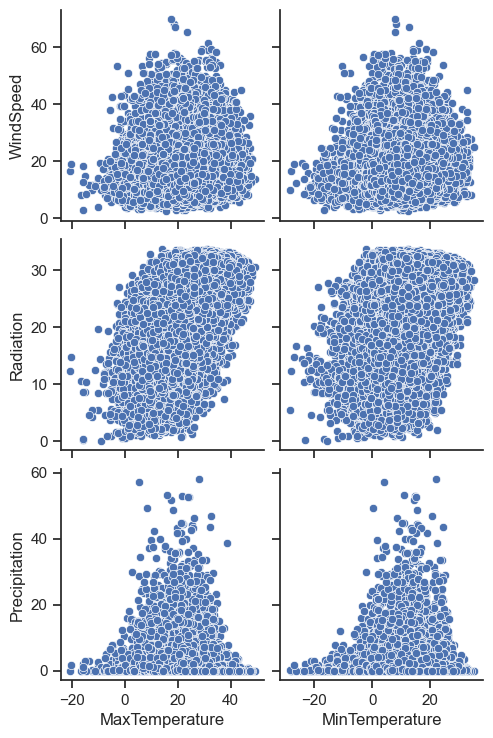

Weather DataFrame description:


,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
count,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000
mean,25.284182,12.049096,16.399824,204.939539,23.144037,0.863292
std,8.208251,7.476020,6.777346,88.950697,6.159196,2.676969
min,-20.600000,-28.400000,2.400000,0.000000,0.100000,0.000000
25%,19.900000,7.100000,11.600000,154.000000,19.520000,0.000000
50%,26.400000,12.800000,15.000000,218.000000,24.360000,0.000000
75%,31.400000,17.200000,19.800000,271.000000,27.850000,0.400000
max,49.000000,35.000000,69.800000,360.000000,33.750000,58.100000


In [8]:
weather_df = df[WEATHER_COLS].copy()

# Visualize the distribution of weather columns with scatter plots
visualize_distributions(weather_df)

print('Weather DataFrame description:')
weather_df.describe(include = 'all')

In [9]:
df.to_csv(FINAL_CSV, index=False)